In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atulyakumar98/pothole-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pothole-detection-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Replace with your actual path inside Google Drive
data_dir = '/kaggle/input/pothole-detection-dataset'

# Check if folders exist
print("Classes:", os.listdir(data_dir))  # should print ['potholes', 'normal']


Classes: ['normal', 'potholes']


In [4]:
img_height, img_width = 150, 150
batch_size = 32

In [5]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80-20 split
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 546 images belonging to 2 classes.


In [7]:
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 135 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5453 - loss: 1.0611 - val_accuracy: 0.6328 - val_loss: 0.6775
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4688 - loss: 0.6823 - val_accuracy: 1.0000 - val_loss: 0.6743
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5976 - loss: 0.6820 - val_accuracy: 0.7266 - val_loss: 0.6317
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.6070 - val_accuracy: 0.2857 - val_loss: 0.6957
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6619 - loss: 0.5697 - val_accuracy: 0.7344 - val_loss: 0.4887
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7500 - loss: 0.4420 - val_accuracy: 1.0000 - val_loss: 0.1433
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7377 - loss: 0.5487 - val_accuracy: 0.7109 - val_loss: 0.5627
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.3573 - val_accuracy: 1.0000 - val_loss: 0.3279
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7586 - loss: 0.5081 - val_accuracy: 0.7734 - val_loss: 0.5331
Epoch 10/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.3209 - val_accuracy: 1.0000 - val_loss: 0.3361
Ep

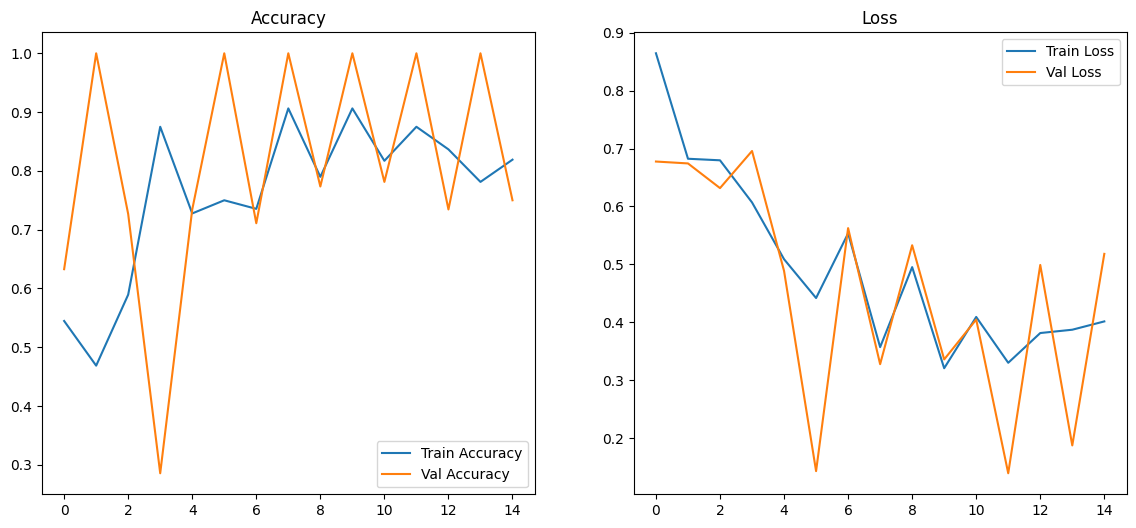

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()


In [12]:
# Predict and evaluate
val_generator.reset()
predictions = (model.predict(val_generator) > 0.5).astype("int32")

# Confusion matrix & classification report
print("Confusion Matrix")
print(confusion_matrix(val_generator.classes, predictions))

print("\nClassification Report")
target_names = list(val_generator.class_indices.keys())
print(classification_report(val_generator.classes, predictions, target_names=target_names))


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step
Confusion Matrix
[[39 31]
 [ 2 63]]

Classification Report
              precision    recall  f1-score   support

      normal       0.95      0.56      0.70        70
    potholes       0.67      0.97      0.79        65

    accuracy                           0.76       135
   macro avg       0.81      0.76      0.75       135
weighted avg       0.82      0.76      0.75       135



In [15]:
model.save("pothole_classifier.h5")